In [19]:
# the purpose of this notebook is to perform a regression analysis on the market data 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# read in the data
strength_tincture_market = pd.read_csv("..\\data\\strength_tincture_market.csv")
mind_tincture_market = pd.read_csv("..\\data\\mind_tincture_market.csv")
vitality_tincture_market = pd.read_csv("..\\data\\vitality_tincture_market.csv")
dexterity_tincture_market = pd.read_csv("..\\data\\dexterity_tincture_market.csv")
intelligence_tincture_market = pd.read_csv("..\\data\\intelligence_tincture_market.csv")

In [20]:
strength_tincture_market.head()


,hq,pricePerUnit,quantity,buyerName,onMannequin,timestamp,worldName,worldID,Name,itemID,year,month,day,hour,minute,second,day_of_week,week_of_year
0,True,2989,47,Edit Undeux,False,2024-03-20 17:28:45,Faerie,54,Grade 8 Tincture of Strength,39727,2024,3,20,17,28,45,Wednesday,12
1,True,2714,99,Mythological Dream,False,2024-03-20 17:27:55,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,27,55,Wednesday,12
2,True,2714,99,Mythological Dream,False,2024-03-20 17:27:53,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,27,53,Wednesday,12
3,True,2714,99,Mythological Dream,False,2024-03-20 17:27:52,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,27,52,Wednesday,12
4,True,2700,99,Bib Kek,False,2024-03-20 17:11:23,Gilgamesh,63,Grade 8 Tincture of Strength,39727,2024,3,20,17,11,23,Wednesday,12


In [21]:
strength_tincture_market.columns

Index(['hq', 'pricePerUnit', 'quantity', 'buyerName', 'onMannequin',
       'timestamp', 'worldName', 'worldID', 'Name', 'itemID', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'day_of_week', 'week_of_year'],
      dtype='object')

In [22]:
# We need to calculate the total price for each sale by multiplying the pricePerUnit by the quantity
strength_tincture_market["totalPrice"] = strength_tincture_market["pricePerUnit"] * strength_tincture_market["quantity"]
mind_tincture_market["totalPrice"] = mind_tincture_market["pricePerUnit"] * mind_tincture_market["quantity"]
vitality_tincture_market["totalPrice"] = vitality_tincture_market["pricePerUnit"] * vitality_tincture_market["quantity"]
dexterity_tincture_market["totalPrice"] = dexterity_tincture_market["pricePerUnit"] * dexterity_tincture_market["quantity"]
intelligence_tincture_market["totalPrice"] = intelligence_tincture_market["pricePerUnit"] * intelligence_tincture_market["quantity"]

# We will use this as a feature in our regression analysis

In [23]:
# We will pull features from the market data to use in our regression analysis
# We will use the following features:
# - quantity
# - totalPrice
# - timestamp
# - hq (high quality)(boolean value)- we will convert this to a binary value

# We will use the following target:
# - pricePerUnit

# We will use the following models:
# - Linear Regression
# - Random Forest Regression
# - Gradient Boosting Regression

# We will use the following metrics to evaluate our models:
# - Mean Squared Error
# - R^2

# We will use the following libraries:
# - pandas
# - numpy
# - matplotlib
# - seaborn
# - statsmodels
# - sklearn

# We will use the following steps:
# - Data Cleaning
# - Data Exploration
# - Data Preprocessing
# - Model Building
# - Model Evaluation

# Data Cleaning
# - Check for missing values
# - Check for duplicate values
# - Check for outliers
# - Check for data types

# Data Exploration
# - Check for distribution of data
# - Check for correlation between features
# - Check for multicollinearity
# - Check for interaction effects


In [24]:
# Data Cleaning
# - Check for missing values

strength_tincture_market.isnull().sum()
mind_tincture_market.isnull().sum()
vitality_tincture_market.isnull().sum()
dexterity_tincture_market.isnull().sum()
intelligence_tincture_market.isnull().sum()

hq              0
pricePerUnit    0
quantity        0
buyerName       0
onMannequin     0
timestamp       0
worldName       0
worldID         0
Name            0
itemID          0
year            0
month           0
day             0
hour            0
minute          0
second          0
day_of_week     0
week_of_year    0
totalPrice      0
dtype: int64

In [25]:
# There are no missing values in the data
# Check for duplicate values

strength_tincture_market.duplicated().sum()
mind_tincture_market.duplicated().sum()
vitality_tincture_market.duplicated().sum()
dexterity_tincture_market.duplicated().sum()
intelligence_tincture_market.duplicated().sum()


0

In [26]:
# There are no duplicate values in the data
# Check for outliers
# We will use the z-score to check for outliers
# We will calculate the z-score for the pricePerUnit column in the data
# We will consider any z-score greater than 3 to be an outlier

strength_tincture_market["z_score"] = (strength_tincture_market["pricePerUnit"] - strength_tincture_market["pricePerUnit"].mean()) / strength_tincture_market["pricePerUnit"].std()
mind_tincture_market["z_score"] = (mind_tincture_market["pricePerUnit"] - mind_tincture_market["pricePerUnit"].mean()) / mind_tincture_market["pricePerUnit"].std()
vitality_tincture_market["z_score"] = (vitality_tincture_market["pricePerUnit"] - vitality_tincture_market["pricePerUnit"].mean()) / vitality_tincture_market["pricePerUnit"].std()
dexterity_tincture_market["z_score"] = (dexterity_tincture_market["pricePerUnit"] - dexterity_tincture_market["pricePerUnit"].mean()) / dexterity_tincture_market["pricePerUnit"].std()
intelligence_tincture_market["z_score"] = (intelligence_tincture_market["pricePerUnit"] - intelligence_tincture_market["pricePerUnit"].mean()) / intelligence_tincture_market["pricePerUnit"].std()

strength_tincture_market["outlier"] = strength_tincture_market["z_score"] > 3
mind_tincture_market["outlier"] = mind_tincture_market["z_score"] > 3
vitality_tincture_market["outlier"] = vitality_tincture_market["z_score"] > 3
dexterity_tincture_market["outlier"] = dexterity_tincture_market["z_score"] > 3
intelligence_tincture_market["outlier"] = intelligence_tincture_market["z_score"] > 3

strength_tincture_market["outlier"].sum()
mind_tincture_market["outlier"].sum()
vitality_tincture_market["outlier"].sum()
dexterity_tincture_market["outlier"].sum()
intelligence_tincture_market["outlier"].sum()



1063

In [27]:
strength_tincture_market["outlier"].sum() # = 1

# There is 1 outlier in the strength tincture market data
# remove the outlier from the data
strength_tincture_market = strength_tincture_market[strength_tincture_market["outlier"] == False]


In [28]:
mind_tincture_market["outlier"].sum() # = 282

# There are 282 outliers in the mind tincture market data
# remove the outliers from the data
mind_tincture_market = mind_tincture_market[mind_tincture_market["outlier"] == False]

In [29]:
vitality_tincture_market["outlier"].sum() # = 25

# There are 25 outliers in the vitality tincture market data
# remove the outliers from the data
vitality_tincture_market = vitality_tincture_market[vitality_tincture_market["outlier"] == False]

In [30]:
dexterity_tincture_market["outlier"].sum()# = 1473

# There are 1473 outliers in the dexterity tincture market data
# remove the outliers from the data
dexterity_tincture_market = dexterity_tincture_market[dexterity_tincture_market["outlier"] == False]

In [31]:
intelligence_tincture_market["outlier"].sum()# = 1063

# There are 1063 outliers in the intelligence tincture market data
# remove the outliers from the data
intelligence_tincture_market = intelligence_tincture_market[intelligence_tincture_market["outlier"] == False]

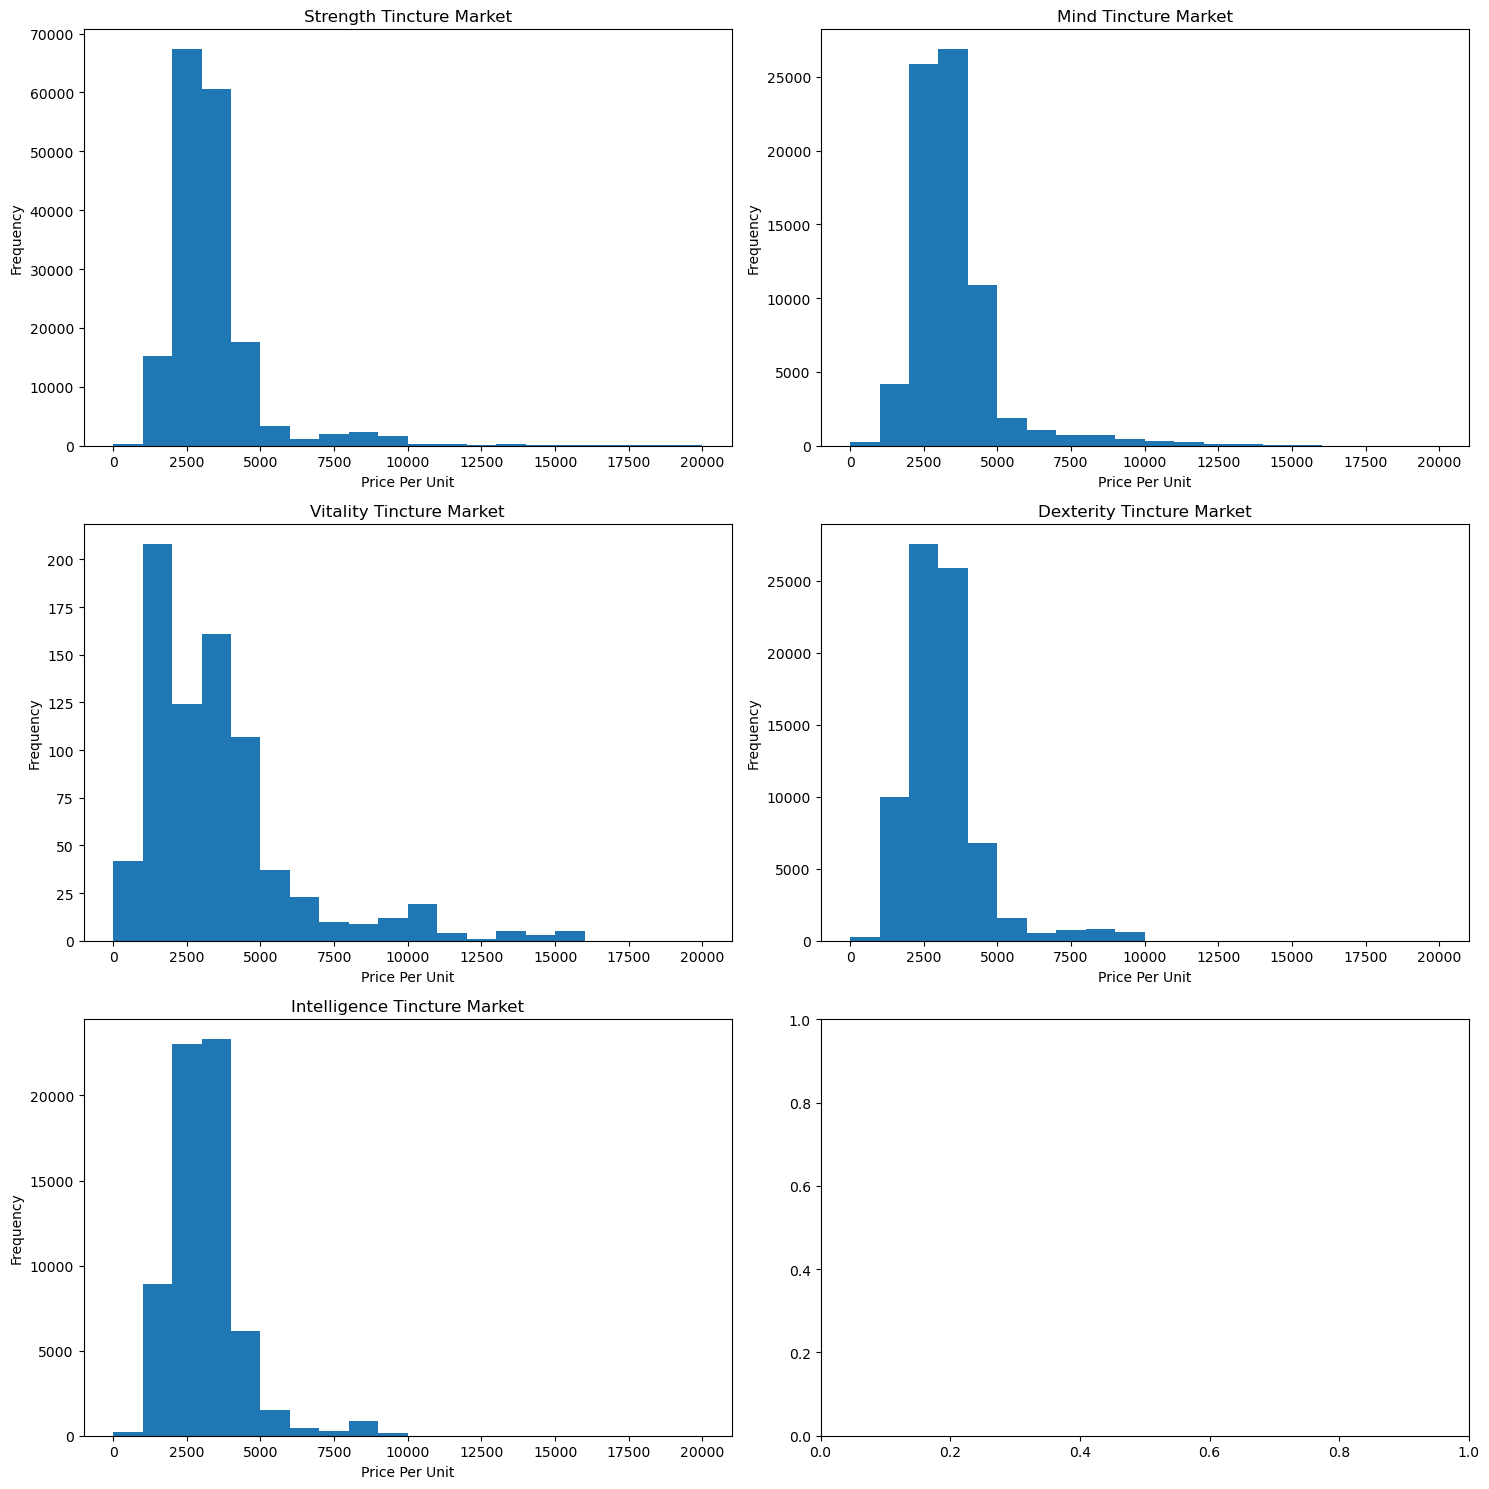

In [32]:
# Data Exploration
# Check for distribution of data
# We will plot histograms of the features in the data

# Let's create a figure with 5 subplots to show the distribution of the pricePerUnit feature for all the markets
fig, axs = plt.subplots(3, 2, figsize = (15, 15))

axs[0, 0].hist(strength_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[0, 0].set_title("Strength Tincture Market")
axs[0, 0].set_xlabel("Price Per Unit")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(mind_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[0, 1].set_title("Mind Tincture Market")
axs[0, 1].set_xlabel("Price Per Unit")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(vitality_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[1, 0].set_title("Vitality Tincture Market")
axs[1, 0].set_xlabel("Price Per Unit")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(dexterity_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[1, 1].set_title("Dexterity Tincture Market")
axs[1, 1].set_xlabel("Price Per Unit")
axs[1, 1].set_ylabel("Frequency")

axs[2, 0].hist(intelligence_tincture_market["pricePerUnit"], bins = 20, range = (0, 20000))
axs[2, 0].set_title("Intelligence Tincture Market")
axs[2, 0].set_xlabel("Price Per Unit")
axs[2, 0].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

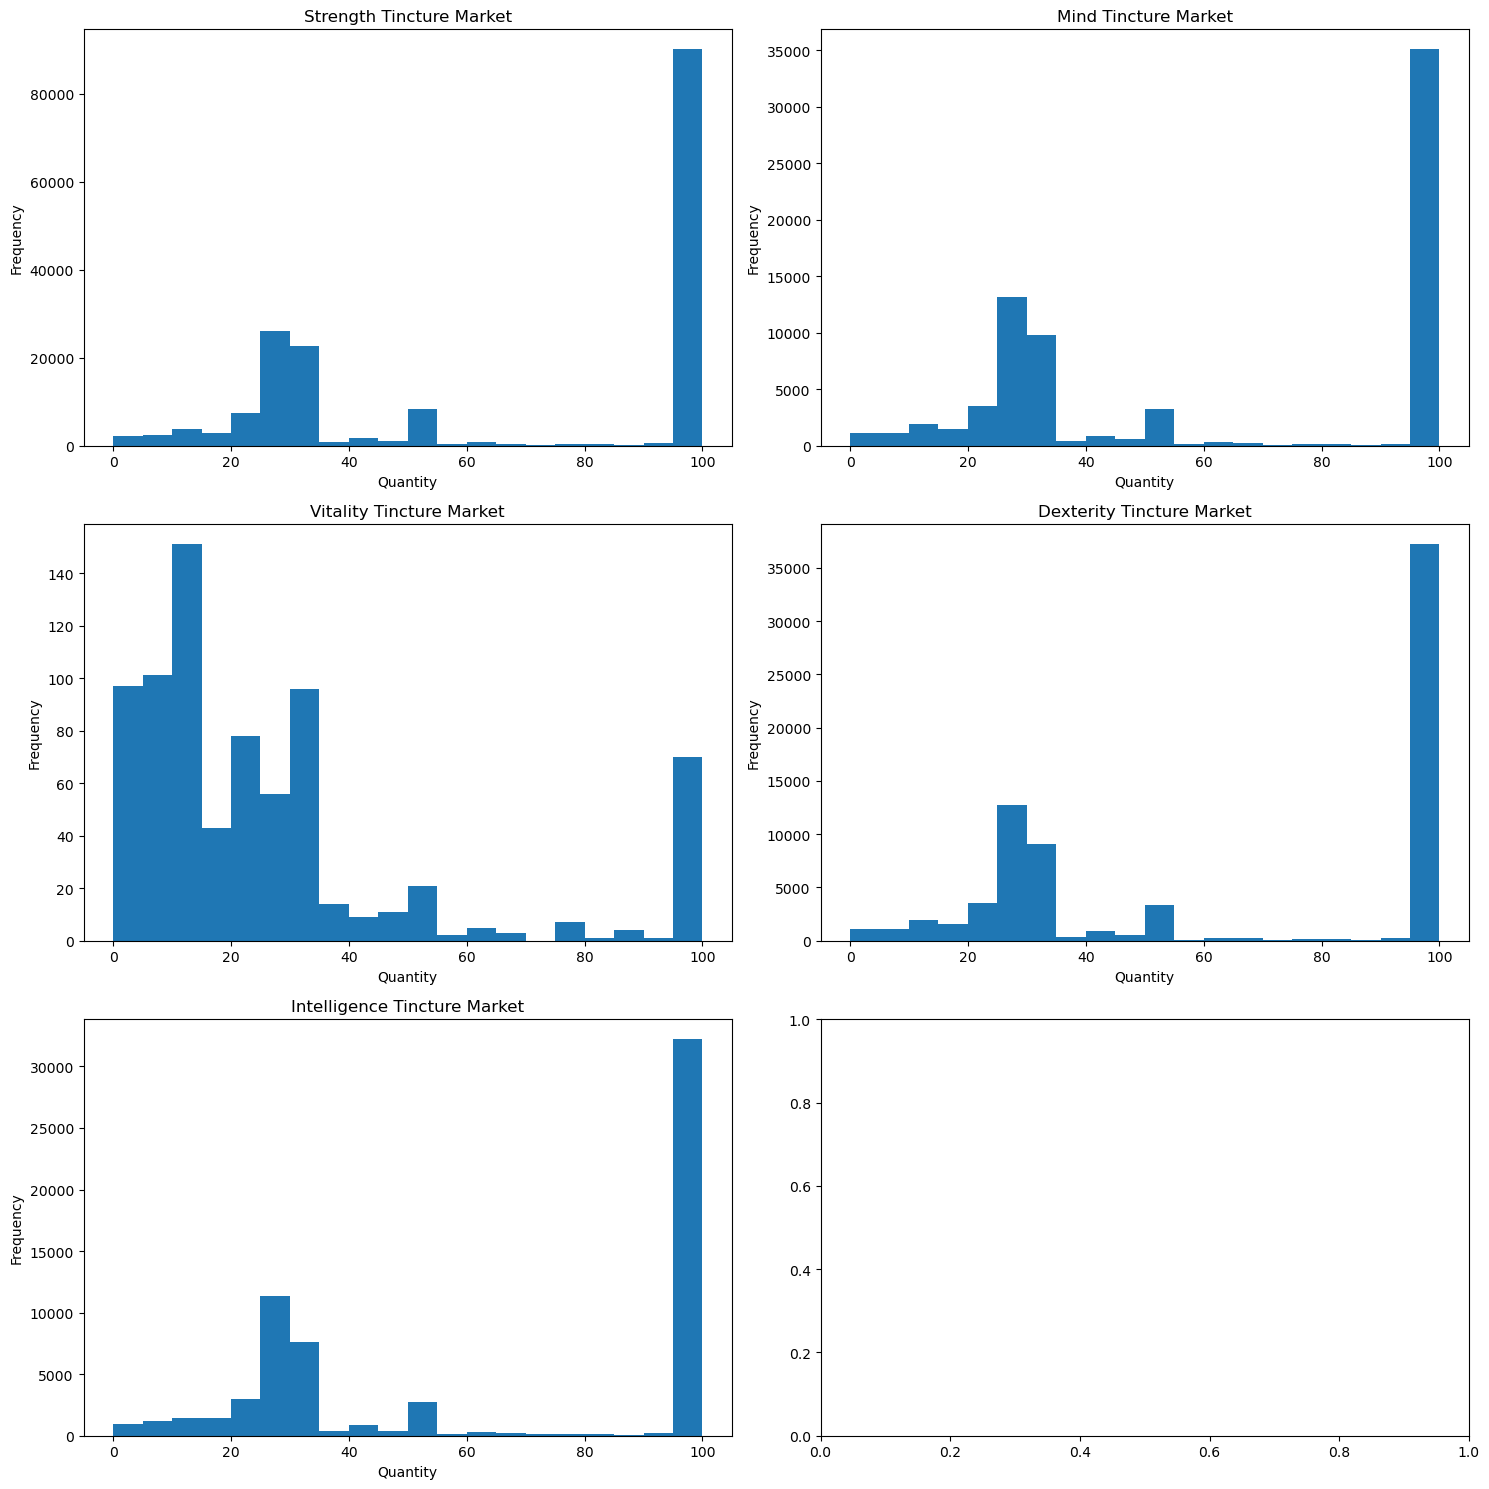

In [33]:
# We will plot multiple histograms of the quantity feature on a new figure
fig, axs = plt.subplots(3, 2, figsize = (15, 15))

axs[0, 0].hist(strength_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[0, 0].set_title("Strength Tincture Market")
axs[0, 0].set_xlabel("Quantity")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(mind_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[0, 1].set_title("Mind Tincture Market")
axs[0, 1].set_xlabel("Quantity")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(vitality_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[1, 0].set_title("Vitality Tincture Market")
axs[1, 0].set_xlabel("Quantity")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(dexterity_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[1, 1].set_title("Dexterity Tincture Market")
axs[1, 1].set_xlabel("Quantity")
axs[1, 1].set_ylabel("Frequency")

axs[2, 0].hist(intelligence_tincture_market["quantity"], bins = 20, range = (0, 100))
axs[2, 0].set_title("Intelligence Tincture Market")
axs[2, 0].set_xlabel("Quantity")
axs[2, 0].set_ylabel("Frequency")

plt.tight_layout()
plt.show()




In [34]:
# We can adjust the data types of some columns in the data 
# This will be so we can use them in our correlation analysis
# We will convert the timestamp column to a datetime data type
strength_tincture_market["timestamp"] = pd.to_datetime(strength_tincture_market["timestamp"])
mind_tincture_market["timestamp"] = pd.to_datetime(mind_tincture_market["timestamp"])
vitality_tincture_market["timestamp"] = pd.to_datetime(vitality_tincture_market["timestamp"])
dexterity_tincture_market["timestamp"] = pd.to_datetime(dexterity_tincture_market["timestamp"])
intelligence_tincture_market["timestamp"] = pd.to_datetime(intelligence_tincture_market["timestamp"])

# We will convert the hq column to a binary data type
strength_tincture_market["hq"] = strength_tincture_market["hq"].astype(int)
mind_tincture_market["hq"] = mind_tincture_market["hq"].astype(int)
vitality_tincture_market["hq"] = vitality_tincture_market["hq"].astype(int)
dexterity_tincture_market["hq"] = dexterity_tincture_market["hq"].astype(int)
intelligence_tincture_market["hq"] = intelligence_tincture_market["hq"].astype(int)



In [35]:
# Data Exploration remaigning steps
# - Check for correlation between features
# - Check for multicollinearity

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

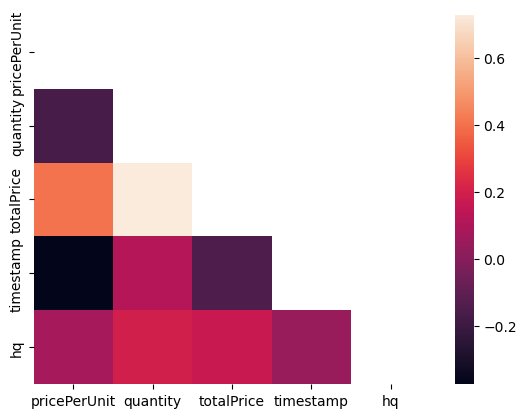

In [36]:
# - Check for correlation between features
# We will calculate the correlation matrix for the features in the data
# We will use the Pearson correlation coefficient to calculate the correlation between the features
# We will plot a heatmap of the correlation matrix


# We will calculate the correlation matrix for the pricePerUnit, quantity, hq, timestamp, and totalPrice features in the data
strength_tincture_market_correlation = strength_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
mind_tincture_market_correlation = mind_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
vitality_tincture_market_correlation = vitality_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
dexterity_tincture_market_correlation = dexterity_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()
intelligence_tincture_market_correlation = intelligence_tincture_market[["pricePerUnit", "quantity", "totalPrice", "timestamp", "hq"]].corr()

# We will plot a heatmap of the correlation matrix for the strength tincture market data
sns.heatmap(strength_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(strength_tincture_market_correlation.corr(), dtype=bool)))


d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

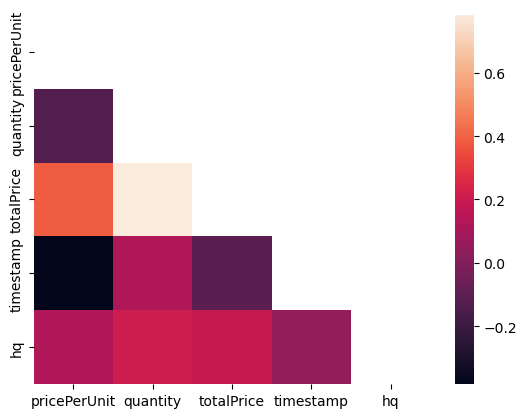

In [37]:
# We will plot a heatmap of the correlation matrix for the mind tincture market data
sns.heatmap(mind_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(mind_tincture_market_correlation.corr(), dtype=bool)))

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

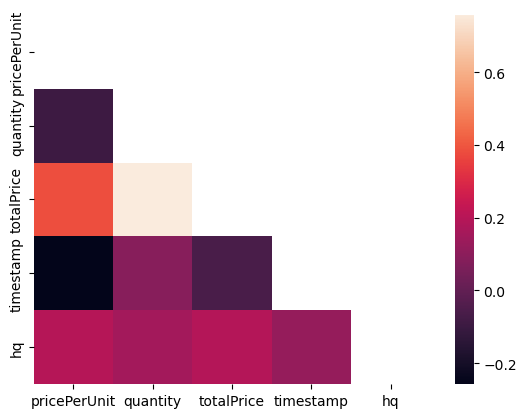

In [38]:
# We will plot a heatmap of the correlation matrix for the vitality tincture market data
sns.heatmap(vitality_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(vitality_tincture_market_correlation.corr(), dtype=bool)))

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

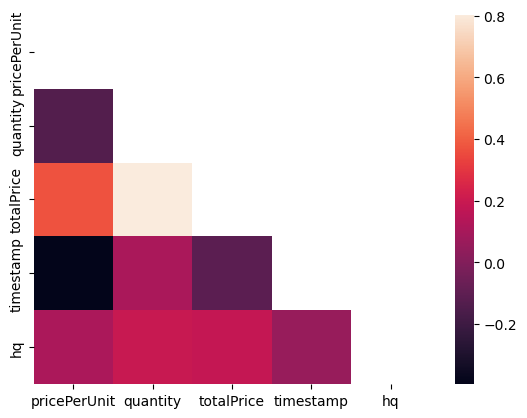

In [39]:
# We will plot a heatmap of the correlation matrix for the dexterity tincture market data
sns.heatmap(dexterity_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(dexterity_tincture_market_correlation.corr(), dtype=bool)))

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

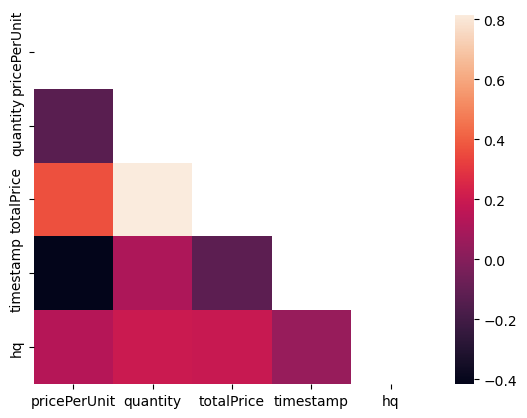

In [40]:
# We will plot a heatmap of the correlation matrix for the intelligence tincture market data
sns.heatmap(intelligence_tincture_market_correlation, annot = True,mask=np.triu(np.ones_like(intelligence_tincture_market_correlation.corr(), dtype=bool)))

In [41]:
# Check for multicollinearity
# We will check for multicollinearity between the features in the data
# We will use the variance inflation factor (VIF) to check for multicollinearity
# We will calculate the VIF for the features in the data
# We will consider any VIF greater than 10 to be an indication of multicollinearity

# We will calculate the VIF for the features in the strength tincture market data
X = strength_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif


,features,VIF
0,const,0.981155
1,quantity,0.535192
2,totalPrice,0.530463
3,hq,0.040769


In [42]:
# We will calculate the VIF for the features in the mind tincture market data
X = mind_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.977969
1,quantity,0.618265
2,totalPrice,0.615638
3,hq,0.043915


In [43]:
# We will calculate the VIF for the features in the vitality tincture market data
X = vitality_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.922493
1,quantity,0.574112
2,totalPrice,0.580005
3,hq,0.036979


In [44]:
# We will calculate the VIF for the features in the dexterity tincture market data
X = dexterity_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.979663
1,quantity,0.647560
2,totalPrice,0.645984
3,hq,0.038791


In [45]:
# We will calculate the VIF for the features in the intelligence tincture market data
X = intelligence_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(columns = [col])).fit().rsquared for col in X.columns]
vif

,features,VIF
0,const,0.980692
1,quantity,0.667626
2,totalPrice,0.666016
3,hq,0.041072


In [46]:
# There is no multicollinearity between the features in the data

In [47]:
# OLS Regression Analysis
# We will perform an OLS regression analysis on the data
# We will use the pricePerUnit as the target variable
# We will use the quantity, totalPrice,timestamp, and hq as the features
# We will use the statsmodels library to perform the regression analysis

# We will perform the regression analysis for the strength tincture market data
X = strength_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = strength_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                 9.047e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:02:27   Log-Likelihood:            -1.4701e+06
No. Observations:              173299   AIC:                         2.940e+06
Df Residuals:                  173295   BIC:                         2.940e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2627.2117     20.459    128.413      0.000    2587.112    2667.311
quantity     -50.8929      0.114   -446.727      0.000     -51.116     -50.670
totalPrice     0.0141   2.79e-05    503.829      0.000       0.014       0.014
hq          1150.0470     21.057     54.616      0.000    1108.776    1191.318
==============================================================================
Omnibus:                   263591.301   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        319126219.469
Skew:                           9.176   Prob(JB):                         0.00
Kurtosis:                     212.425   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

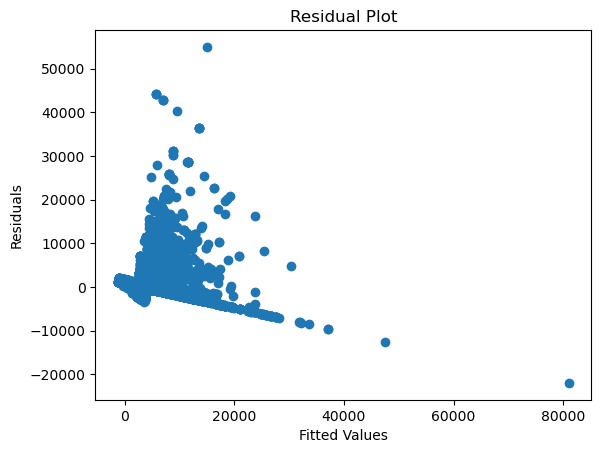

In [48]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [49]:
# We will perform the regression analysis for the mind tincture market data
X = mind_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = mind_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                 4.672e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:04:55   Log-Likelihood:            -6.0783e+05
No. Observations:               73726   AIC:                         1.216e+06
Df Residuals:                   73722   BIC:                         1.216e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2480.2263     22.855    108.519      0.000    2435.430    2525.023
quantity     -49.3439      0.150   -328.540      0.000     -49.638     -49.050
totalPrice     0.0135   3.74e-05    362.440      0.000       0.013       0.014
hq          1273.2442     23.603     53.945      0.000    1226.983    1319.505
==============================================================================
Omnibus:                    59044.159   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2063782.964
Skew:                           3.627   Prob(JB):                         0.00
Kurtosis:                      27.884   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

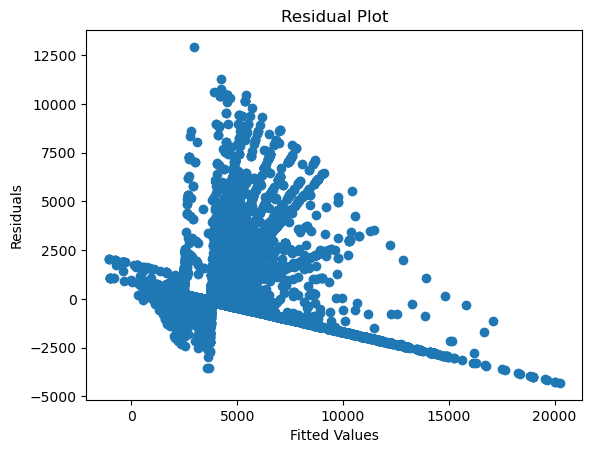

In [50]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [51]:
# We will perform the regression analysis for the vitality tincture market data
X = vitality_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = vitality_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     267.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          1.26e-118
Time:                        12:05:12   Log-Likelihood:                -6886.2
No. Observations:                 770   AIC:                         1.378e+04
Df Residuals:                     766   BIC:                         1.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2411.6940    240.390     10.032      0.000    1939.793    2883.595
quantity     -87.0090      3.728    -23.341      0.000     -94.327     -79.691
totalPrice     0.0254      0.001     26.765      0.000       0.024       0.027
hq          1324.5918    252.506      5.246      0.000     828.905    1820.279
==============================================================================
Omnibus:                      297.484   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.194
Skew:                           1.733   Prob(JB):                    3.96e-299
Kurtosis:                       8.552   Cond. No.                     7.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

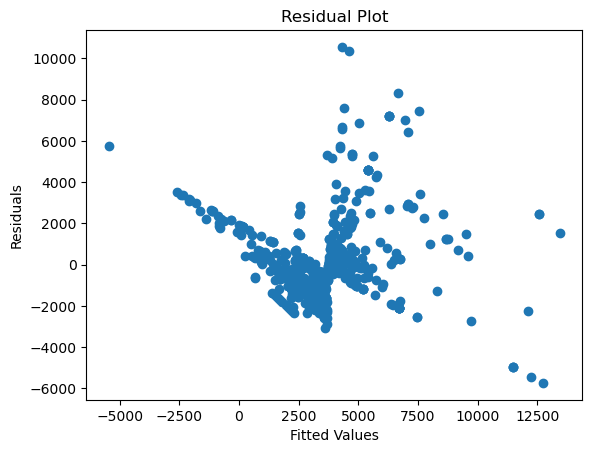

In [52]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [53]:
# We will perform the regression analysis for the dexterity tincture market data
X = dexterity_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = dexterity_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 5.358e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:05:31   Log-Likelihood:            -5.9771e+05
No. Observations:               74692   AIC:                         1.195e+06
Df Residuals:                   74688   BIC:                         1.195e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2478.2996     18.551    133.595      0.000    2441.940    2514.659
quantity     -43.5249      0.122   -357.529      0.000     -43.764     -43.286
totalPrice     0.0130   3.33e-05    389.538      0.000       0.013       0.013
hq           955.6968     19.080     50.088      0.000     918.300     993.094
==============================================================================
Omnibus:                    45068.330   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           659824.339
Skew:                           2.658   Prob(JB):                         0.00
Kurtosis:                      16.556   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

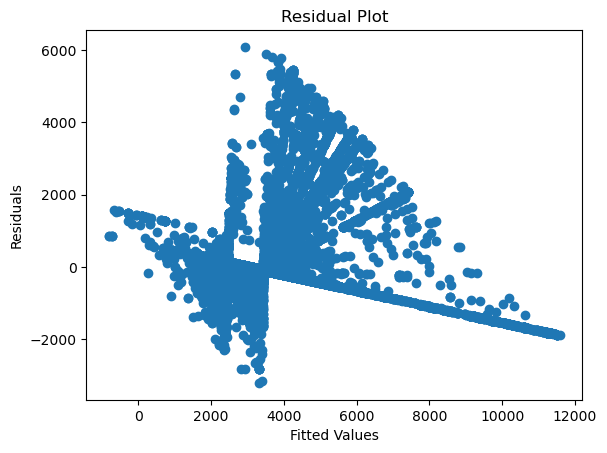

In [54]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [55]:
# We will perform the regression analysis for the intelligence tincture market data
X = intelligence_tincture_market[["quantity", "totalPrice", "hq"]]
X = sm.add_constant(X)
y = intelligence_tincture_market["pricePerUnit"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricePerUnit   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                 4.945e+04
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:05:51   Log-Likelihood:            -5.1384e+05
No. Observations:               64938   AIC:                         1.028e+06
Df Residuals:                   64934   BIC:                         1.028e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2241.3749     18.669    120.061      0.000    2204.784    2277.965
quantity     -42.4108      0.123   -345.012      0.000     -42.652     -42.170
totalPrice     0.0128   3.42e-05    372.742      0.000       0.013       0.013
hq          1152.9205     19.227     59.963      0.000    1115.235    1190.606
==============================================================================
Omnibus:                    39161.981   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           618463.714
Skew:                           2.626   Prob(JB):                         0.00
Kurtosis:                      17.177   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

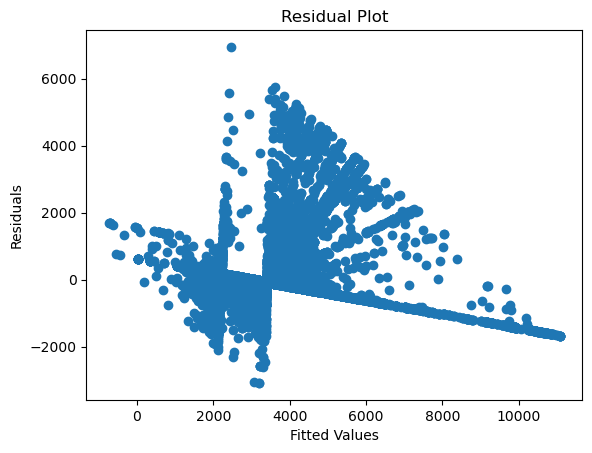

In [56]:
# Plot the residuals
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [64]:
# Model Building with sklearn insterad of statsmodels

# We will build a linear regression model to predict the pricePerUnit of the tinctures
# We will use the quantity, totalPrice, and hq as the features
# We will use the pricePerUnit as the target variable
# We will split the data into training and testing sets
# We will train the model on the training set
# We will evaluate the model on the testing set

# We will build the linear regression model for the strength tincture market data
X = strength_tincture_market[["quantity", "totalPrice", "hq"]]
y = strength_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse



1517501.3848583016

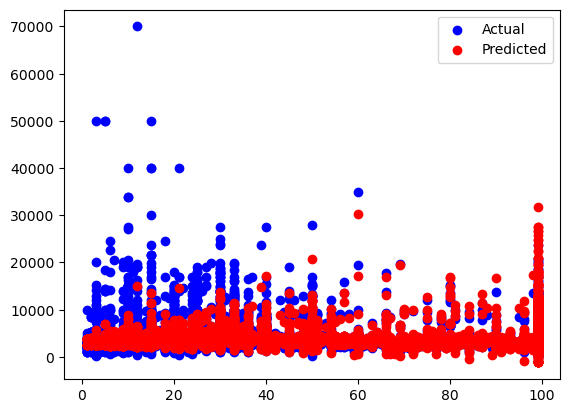

In [66]:
# Create a scatter plot of the actual values
plt.scatter(X_test["quantity"], y_test, color='blue', label='Actual')

# Create a scatter plot of the predicted values
plt.scatter(X_test["quantity"], y_pred, color='red', label='Predicted')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [67]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 553.375322204733
Mean Squared Error: 1517501.3848583016
Root Mean Squared Error: 1231.8690615720088
R-squared: 0.5931784858969055


In [58]:
# We will build the linear regression model for the mind tincture market data
X = mind_tincture_market[["quantity", "totalPrice", "hq"]]
y = mind_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

830026.0127304496

In [59]:
# We will build the linear regression model for the vitality tincture market data
X = vitality_tincture_market[["quantity", "totalPrice", "hq"]]
y = vitality_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

2340365.3395857248

In [60]:
# We will build the linear regression model for the dexterity tincture market data
X = dexterity_tincture_market[["quantity", "totalPrice", "hq"]]
y = dexterity_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

487785.2218626722

In [61]:
# We will build the linear regression model for the intelligence tincture market data
X = intelligence_tincture_market[["quantity", "totalPrice", "hq"]]
y = intelligence_tincture_market["pricePerUnit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse


422735.32774958183